[The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

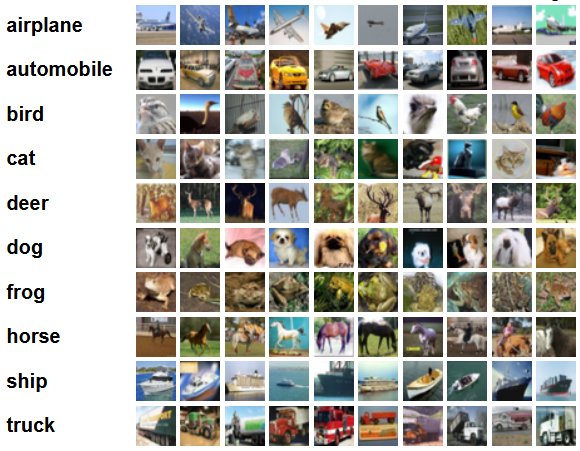

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

CIFAR Vehicles - MultiClass Image Classification with CNN

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
vehicle_classes = [0, 1, 8, 9] # airplane, automobile, ship, truck

In [5]:
train_mask_vehicles = np.isin(train_labels, vehicle_classes).flatten()
train_images_vehicles = train_images[train_mask_vehicles]
train_labels_vehicles = train_labels[train_mask_vehicles]

test_mask_vehicles = np.isin(test_labels, vehicle_classes).flatten()
test_images_vehicles = test_images[test_mask_vehicles]
test_labels_vehicles = test_labels[test_mask_vehicles]

train_labels_vehicles = np.array([labels[label[0]] for label in train_labels_vehicles])
test_labels_vehicles = np.array([labels[label[0]] for label in test_labels_vehicles])

print(f"Number of vehicle images in training set: {len(train_images_vehicles)}")
print(f"Number of vehicle images in test set: {len(test_images_vehicles)}")

Number of vehicle images in training set: 20000
Number of vehicle images in test set: 4000


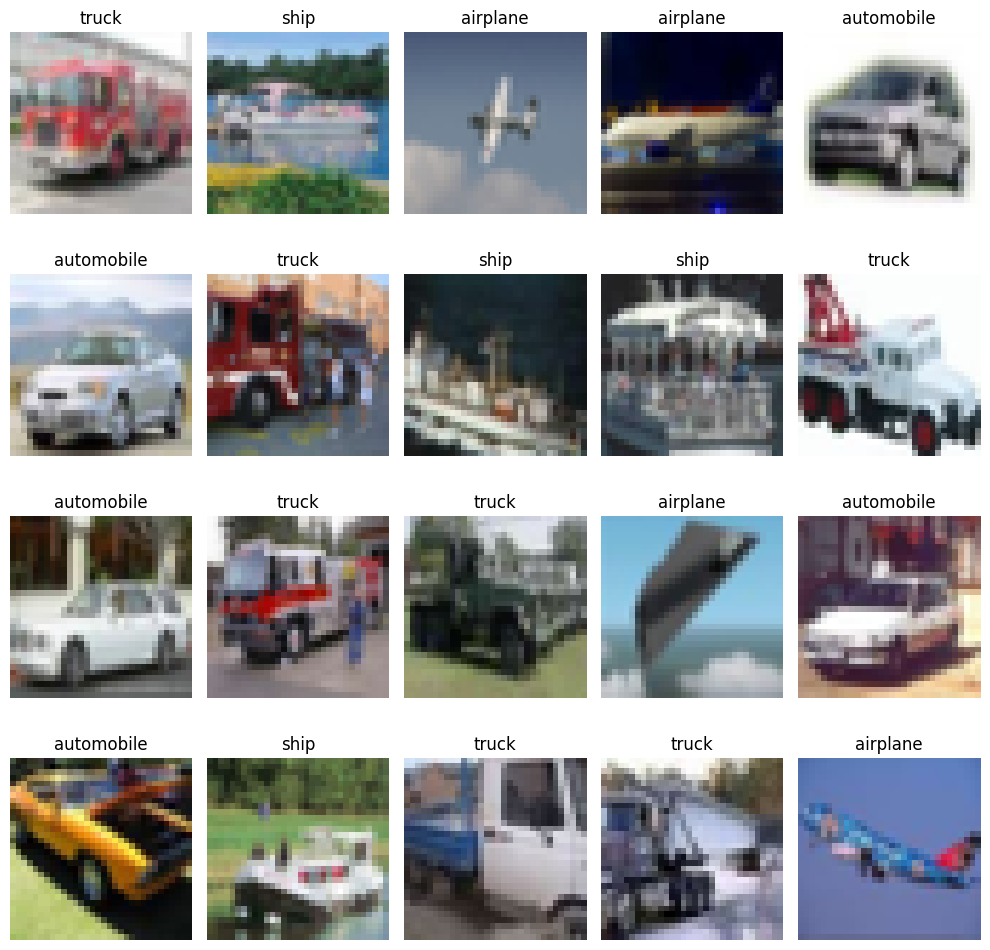

In [7]:
plt.figure(figsize=(10, 10))
indices_vehicles = np.random.choice(len(train_images_vehicles), 20, replace=False)
for i, idx in enumerate(indices_vehicles):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images_vehicles[idx])
    plt.title(train_labels_vehicles[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
unique_classes, counts = np.unique(train_labels_vehicles, return_counts=True)
print("Num of imgs per class:")
for cls, count in zip(unique_classes, counts):
    print(f"{cls}: {count}")

Num of imgs per class:
airplane: 5000
automobile: 5000
ship: 5000
truck: 5000


In [9]:
train_images_vehicles = train_images_vehicles / 255.0
test_images_vehicles = test_images_vehicles / 255.0

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder_vehicles = LabelEncoder()
train_labels_vehicles_encoded = label_encoder_vehicles.fit_transform(train_labels_vehicles)
test_labels_vehicles_encoded = label_encoder_vehicles.transform(test_labels_vehicles)

###Models

###LeNet

In [12]:
def model_one_lenet5():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), strides=1, activation='relu', input_shape=(32, 32, 3)),
        layers.AveragePooling2D(pool_size=(2, 2), strides=2),

        layers.Conv2D(16, kernel_size=(5, 5), strides=1, activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=2),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    return model

In [13]:
model_one = model_one_lenet5()
model_one.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,496 (240.22 KB)

 Trainable params: 61,496 (240.22 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_one.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_one = model_one.fit(train_images_vehicles, train_labels_vehicles_encoded, epochs=10,
                            validation_data=(test_images_vehicles, test_labels_vehicles_encoded))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.4743 - loss: 1.1540 - val_accuracy: 0.6305 - val_loss: 0.8977
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.6549 - loss: 0.8476 - val_accuracy: 0.6963 - val_loss: 0.7609
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7080 - loss: 0.7331 - val_accuracy: 0.6923 - val_loss: 0.7464
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.7395 - loss: 0.6621 - val_accuracy: 0.7383 - val_loss: 0.6711
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7731 - loss: 0.5824 - val_accuracy: 0.7628 - val_loss: 0.6133
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7855 - loss: 0.5507 - val_accuracy: 0.7778 - val_loss: 0.5823
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8051 - loss: 0.5005 - val_accuracy: 0.7350 - val_loss: 0.6828
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8170 - loss: 0.4729 - 


Evaluating LeNet-5 Model:
125/125 - 1s - 12ms/step - accuracy: 0.7990 - loss: 0.5469
Test Loss: 0.5469
Test Accuracy: 0.7990


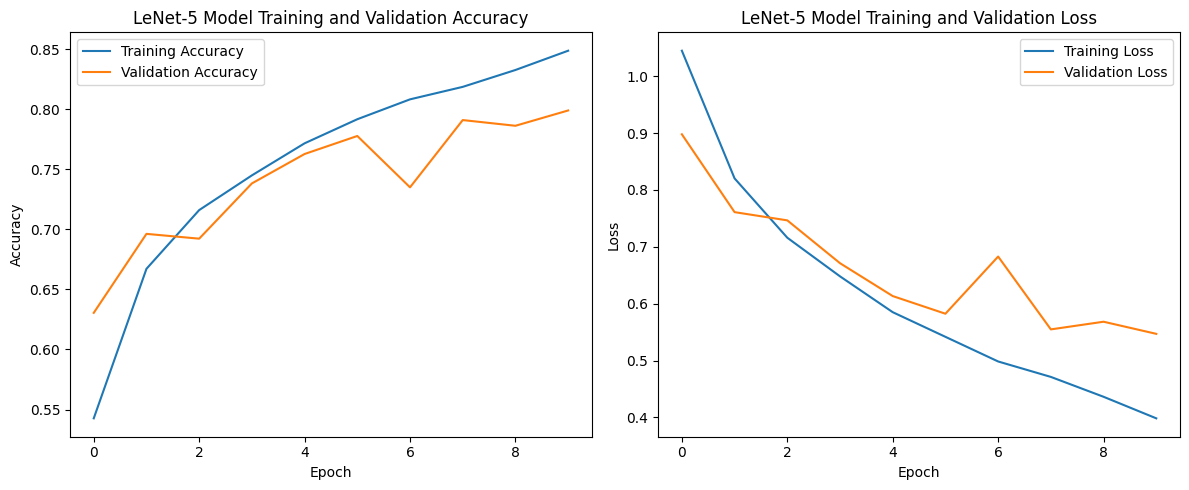

In [15]:
print("\nEvaluating LeNet-5 Model:")
loss_one, accuracy_one = model_one.evaluate(test_images_vehicles, test_labels_vehicles_encoded, verbose=2)
print(f"Test Loss: {loss_one:.4f}")
print(f"Test Accuracy: {accuracy_one:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_one.history['accuracy'], label='Training Accuracy')
plt.plot(history_one.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LeNet-5 Model Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_one.history['loss'], label='Training Loss')
plt.plot(history_one.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LeNet-5 Model Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


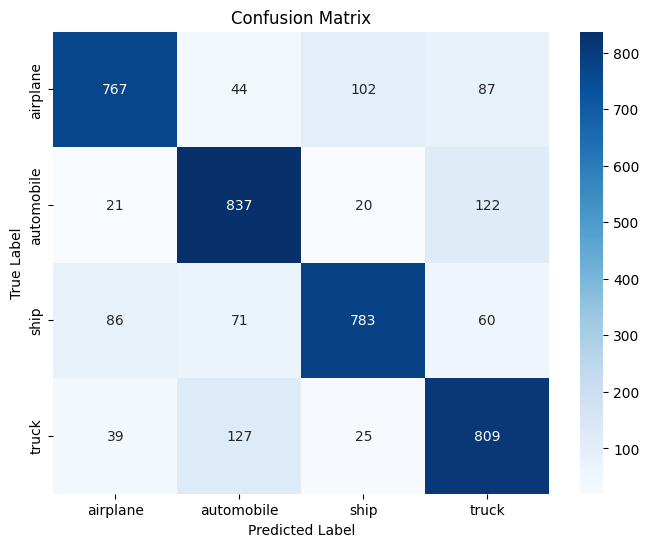

In [16]:
test_predictions = model_one.predict(test_images_vehicles)
predicted_labels_encoded = np.argmax(test_predictions, axis=1)
true_labels_encoded = test_labels_vehicles_encoded

cm = confusion_matrix(true_labels_encoded, predicted_labels_encoded)
class_names = label_encoder_vehicles.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##LeNet "Improved"

MaxPooling is often better than AveragePooling for images because it highlights the most important features.

In [17]:
def improved_lenet_maxpool():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), strides=1, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        layers.Conv2D(16, kernel_size=(5, 5), strides=1, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    return model

In [18]:
model_improved_1 = improved_lenet_maxpool()
model_improved_1.summary()
model_improved_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_improved_1 = model_improved_1.fit(train_images_vehicles, train_labels_vehicles_encoded, epochs=10, validation_data=(test_images_vehicles, test_labels_vehicles_encoded))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,496 (240.22 KB)

 Trainable params: 61,496 (240.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.4960 - loss: 1.1209 - val_accuracy: 0.6390 - val_loss: 0.8971
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.6786 - loss: 0.8045 - val_accuracy: 0.7153 - val_loss: 0.7031
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.7441 - loss: 0.6592 - val_accuracy: 0.7375 - val_loss: 0.6580
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7715 - loss: 0.6000 - val_accuracy: 0.7620 - val_loss: 0.6009
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8012 - loss: 0.5286 - val_accuracy: 0.7678 - val_loss: 0.6026
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8224 - loss: 0.4698 - val_accuracy: 0.7680 - val_loss: 0.5764
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8418 - loss: 0.4277 - val_accuracy: 0.8035 - val_loss: 0.5172
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8586 - loss: 0.3880 - 


Evaluating improved LeNet (MaxPooling) model:
125/125 - 1s - 8ms/step - accuracy: 0.8135 - loss: 0.5349
Test Loss: 0.5349
Test Accuracy: 0.8135


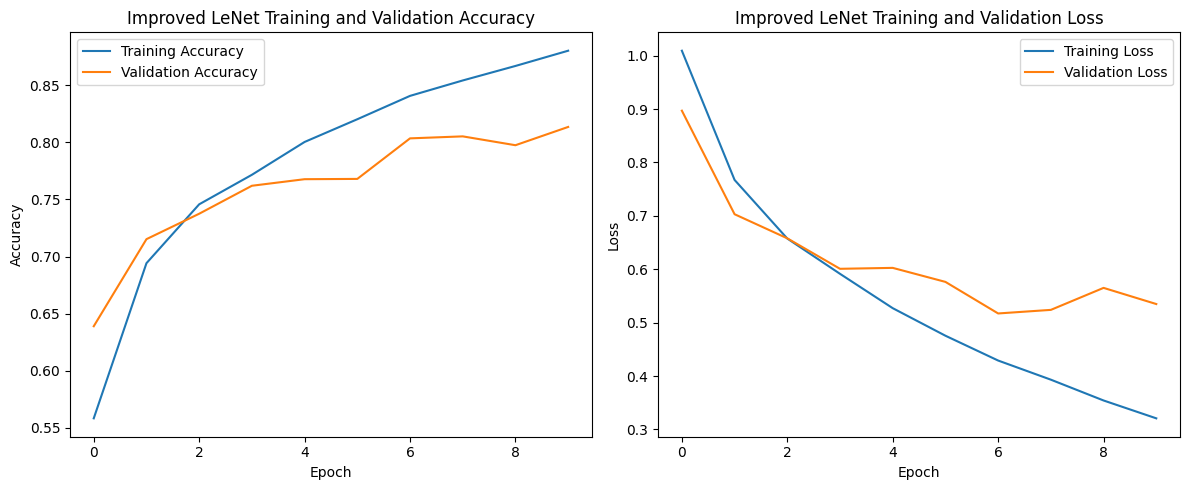

In [19]:
print("\nEvaluating improved LeNet (MaxPooling) model:")
loss_improved_1, accuracy_improved_1 = model_improved_1.evaluate(test_images_vehicles, test_labels_vehicles_encoded, verbose=2)
print(f"Test Loss: {loss_improved_1:.4f}")
print(f"Test Accuracy: {accuracy_improved_1:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_improved_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Improved LeNet Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved_1.history['loss'], label='Training Loss')
plt.plot(history_improved_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Improved LeNet Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


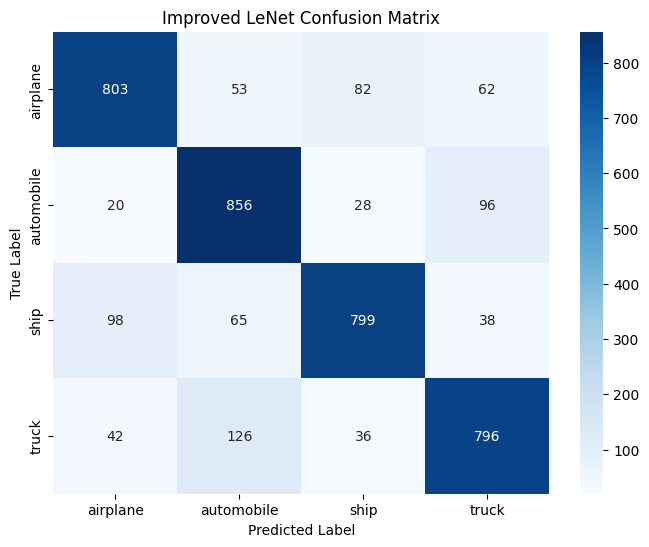

In [20]:
test_predictions_improved_1 = model_improved_1.predict(test_images_vehicles)
predicted_labels_encoded_improved_1 = np.argmax(test_predictions_improved_1, axis=1)
true_labels_encoded_improved_1 = test_labels_vehicles_encoded

cm_improved_1 = confusion_matrix(true_labels_encoded_improved_1, predicted_labels_encoded_improved_1)
class_names = label_encoder_vehicles.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm_improved_1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Improved LeNet Confusion Matrix')
plt.show()

##LeNet "Improved 2"

All pooling layers are MaxPooling (keep what has already brought improvement).
The first layer has 32 filters, the second 64, and the third 128 (more filters = more learned features).
A third convolutional layer has been added (the model is deeper).

In [21]:
def improved_lenet_v2():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    return model

In [22]:
model_improved_2 = improved_lenet_v2()
model_improved_2.summary()
model_improved_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_improved_2 = model_improved_2.fit(train_images_vehicles, train_labels_vehicles_encoded, epochs=10, validation_data=(test_images_vehicles, test_labels_vehicles_encoded))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,036 (1.36 MB)

 Trainable params: 356,036 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.5086 - loss: 1.0906 - val_accuracy: 0.6858 - val_loss: 0.7766
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7471 - loss: 0.6621 - val_accuracy: 0.8100 - val_loss: 0.5280
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8157 - loss: 0.5006 - val_accuracy: 0.8305 - val_loss: 0.4724
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.8473 - loss: 0.4050 - val_accuracy: 0.8375 - val_loss: 0.4690
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.8738 - loss: 0.3388 - val_accuracy: 0.8117 - val_loss: 0.5049
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.8896 - loss: 0.2989 - val_accuracy: 0.8570 - val_loss: 0.4197
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9116 - loss: 0.2480 - val_accuracy: 0.8490 - val_loss: 0.4400
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9248 - loss: 0.2043 - 


Evaluating improved LeNet v2:
125/125 - 1s - 11ms/step - accuracy: 0.8615 - loss: 0.4763
Test Loss: 0.4763
Test Accuracy: 0.8615


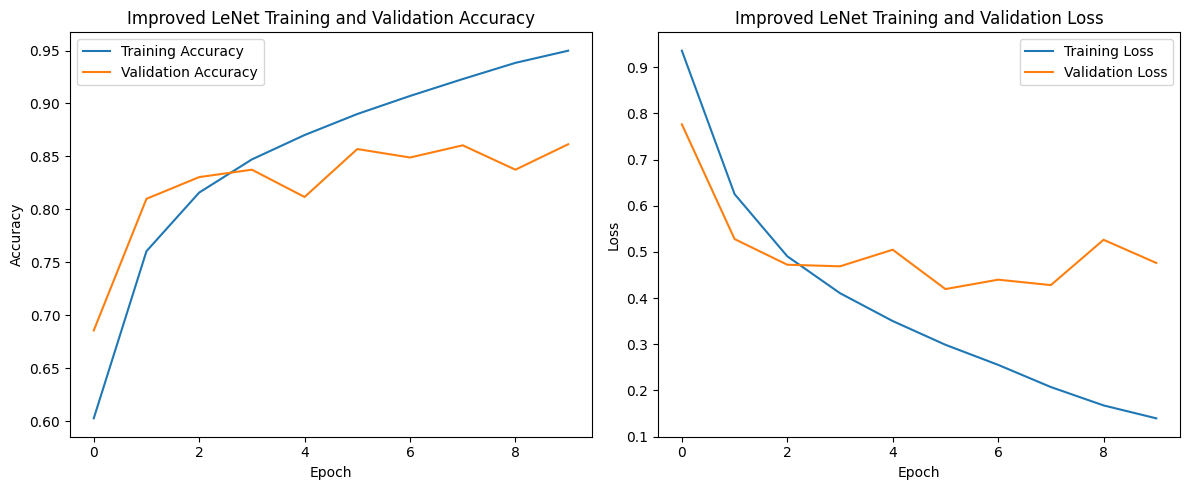

In [23]:
print("\nEvaluating improved LeNet v2:")
loss_improved_2, accuracy_improved_2 = model_improved_2.evaluate(test_images_vehicles, test_labels_vehicles_encoded, verbose=2)
print(f"Test Loss: {loss_improved_2:.4f}")
print(f"Test Accuracy: {accuracy_improved_2:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_improved_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Improved LeNet Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved_2.history['loss'], label='Training Loss')
plt.plot(history_improved_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Improved LeNet Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


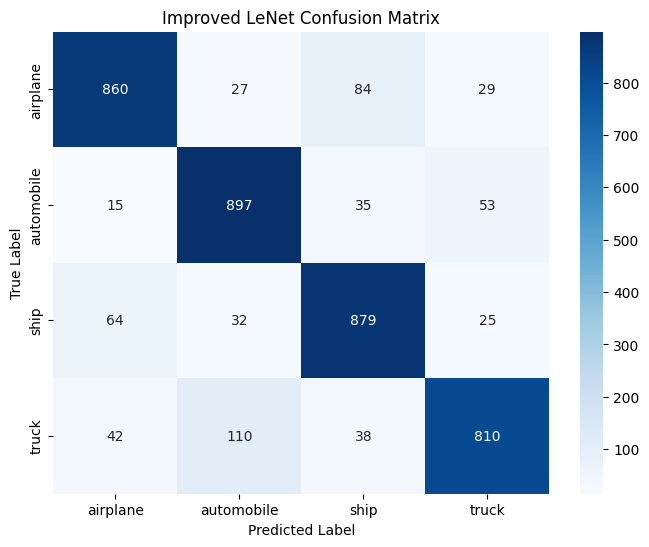

In [24]:
test_predictions_improved_2 = model_improved_2.predict(test_images_vehicles)
predicted_labels_encoded_improved_2 = np.argmax(test_predictions_improved_2, axis=1)
true_labels_encoded_improved_2 = test_labels_vehicles_encoded

cm_improved_2 = confusion_matrix(true_labels_encoded_improved_2, predicted_labels_encoded_improved_2)
class_names = label_encoder_vehicles.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm_improved_2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Improved LeNet Confusion Matrix')
plt.show()

##LeNet "Improved v3"

Dropout randomly turns off neurons during training, which stops the model from relying too much on specific details. This helps the model learn general patterns instead of memorizing training data.

In [25]:
def improved_lenet_v3():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
    ])
    return model

In [26]:
model_improved_3 = improved_lenet_v3()
model_improved_3.summary()
model_improved_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_improved_3 = model_improved_3.fit(train_images_vehicles, train_labels_vehicles_encoded, epochs=10, validation_data=(test_images_vehicles, test_labels_vehicles_encoded))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,036 (1.36 MB)

 Trainable params: 356,036 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.4392 - loss: 1.1951 - val_accuracy: 0.6562 - val_loss: 0.8339
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.6535 - loss: 0.8569 - val_accuracy: 0.7390 - val_loss: 0.6564
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.7411 - loss: 0.6791 - val_accuracy: 0.7995 - val_loss: 0.5281
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.7800 - loss: 0.5917 - val_accuracy: 0.8200 - val_loss: 0.4717
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.8053 - loss: 0.5311 - val_accuracy: 0.8185 - val_loss: 0.4800
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.8248 - loss: 0.4732 - val_accuracy: 0.8372 - val_loss: 0.4364
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.8427 - loss: 0.4242 - val_accuracy: 0.8580 - val_loss: 0.3934
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.8484 - loss: 0.4118 - 


Evaluating improved LeNet v3:
125/125 - 1s - 11ms/step - accuracy: 0.8675 - loss: 0.3695
Test Loss: 0.3695
Test Accuracy: 0.8675


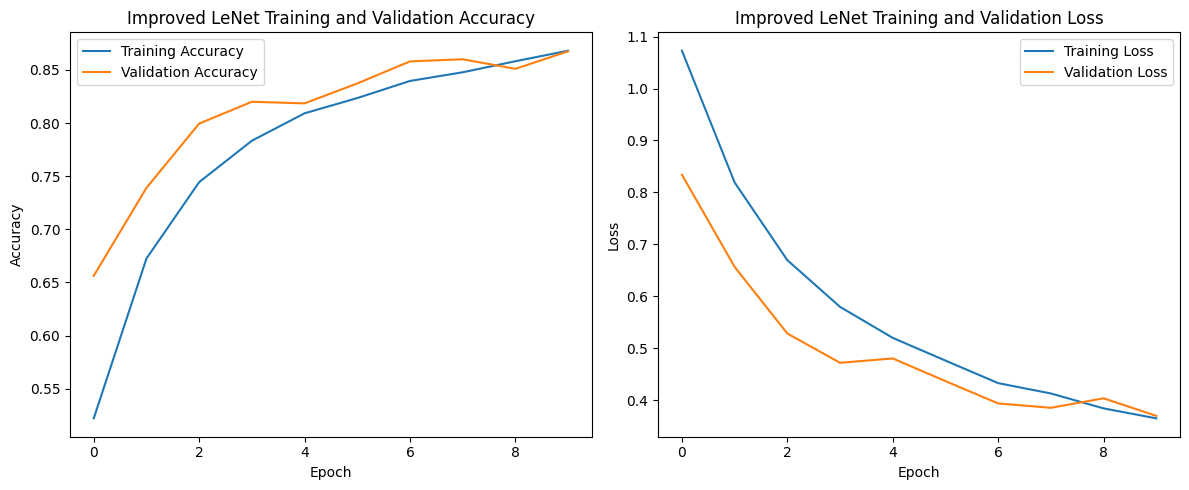

In [27]:
print("\nEvaluating improved LeNet v3:")
loss_improved_3, accuracy_improved_3 = model_improved_3.evaluate(test_images_vehicles, test_labels_vehicles_encoded, verbose=2)
print(f"Test Loss: {loss_improved_3:.4f}")
print(f"Test Accuracy: {accuracy_improved_3:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_improved_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Improved LeNet Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved_3.history['loss'], label='Training Loss')
plt.plot(history_improved_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Improved LeNet Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


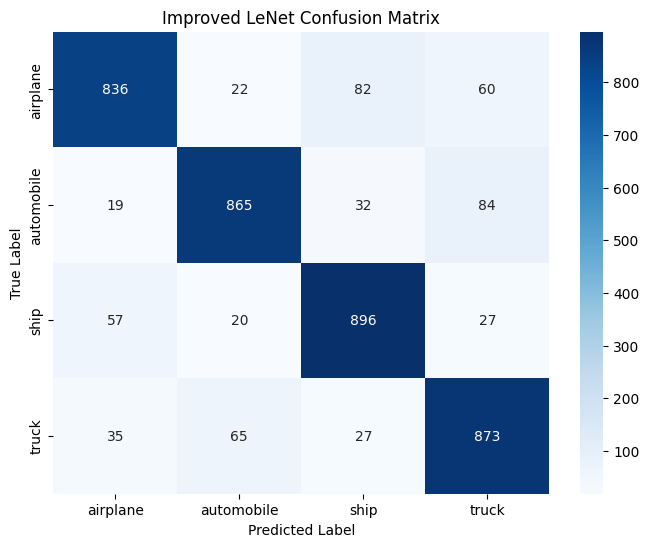

In [28]:
test_predictions_improved_3 = model_improved_3.predict(test_images_vehicles)
predicted_labels_encoded_improved_3 = np.argmax(test_predictions_improved_3, axis=1)
true_labels_encoded_improved_3 = test_labels_vehicles_encoded

cm_improved_3 = confusion_matrix(true_labels_encoded_improved_3, predicted_labels_encoded_improved_3)
class_names = label_encoder_vehicles.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm_improved_3, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Improved LeNet Confusion Matrix')
plt.show()

##LeNet "Improved v4"

Adding BatchNormalization layers after each Conv2D layer often makes training more stable and faster.

In [29]:
def improved_lenet_v4():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
    ])
    return model

In [30]:
model_improved_4 = improved_lenet_v4()
model_improved_4.summary()
model_improved_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_improved_4 = model_improved_4.fit(train_images_vehicles, train_labels_vehicles_encoded, epochs=10, validation_data=(test_images_vehicles, test_labels_vehicles_encoded))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,444 (1.36 MB)

 Trainable params: 356,740 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 69ms/step - accuracy: 0.5020 - loss: 1.3651 - val_accuracy: 0.6862 - val_loss: 0.7646
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.7034 - loss: 0.7485 - val_accuracy: 0.7327 - val_loss: 0.6978
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.7763 - loss: 0.5961 - val_accuracy: 0.6823 - val_loss: 0.8753
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 70ms/step - accuracy: 0.8087 - loss: 0.5141 - val_accuracy: 0.8183 - val_loss: 0.4869
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.8434 - loss: 0.4269 - val_accuracy: 0.7360 - val_loss: 0.7064
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 68ms/step - accuracy: 0.8502 - loss: 0.4042 - val_accuracy: 0.7168 - val_loss: 0.7449
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.8615 - loss: 0.3714 - val_accuracy: 0.8148 - val_loss: 0.5046
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 68ms/step - accuracy: 0.8766 - loss: 0.3456 - 


Evaluating improved LeNet v4:
125/125 - 3s - 21ms/step - accuracy: 0.8662 - loss: 0.3738
Test Loss: 0.3738
Test Accuracy: 0.8662


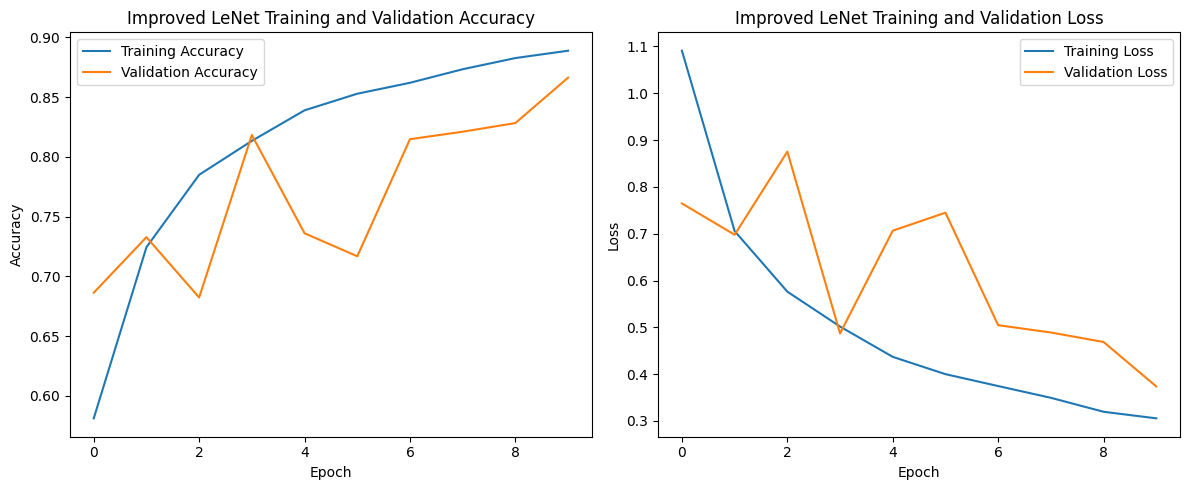

In [31]:
print("\nEvaluating improved LeNet v4:")
loss_improved_4, accuracy_improved_4 = model_improved_4.evaluate(test_images_vehicles, test_labels_vehicles_encoded, verbose=2)
print(f"Test Loss: {loss_improved_4:.4f}")
print(f"Test Accuracy: {accuracy_improved_4:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_improved_4.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Improved LeNet Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved_4.history['loss'], label='Training Loss')
plt.plot(history_improved_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Improved LeNet Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

##Improved model_v3 - v5

Higher number of epochs

In [32]:
model_improved_5 = improved_lenet_v3()
model_improved_5.summary()
model_improved_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_improved_5 = model_improved_5.fit(train_images_vehicles, train_labels_vehicles_encoded, epochs=15, validation_data=(test_images_vehicles, test_labels_vehicles_encoded))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,036 (1.36 MB)

 Trainable params: 356,036 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.4166 - loss: 1.2010 - val_accuracy: 0.6815 - val_loss: 0.8088
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6690 - loss: 0.8245 - val_accuracy: 0.7160 - val_loss: 0.7165
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.7455 - loss: 0.6704 - val_accuracy: 0.7997 - val_loss: 0.5410
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7806 - loss: 0.5713 - val_accuracy: 0.8100 - val_loss: 0.5004
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.8090 - loss: 0.5025 - val_accuracy: 0.8367 - val_loss: 0.4284
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.8354 - loss: 0.4457 - val_accuracy: 0.8428 - val_loss: 0.4188
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.8408 - loss: 0.4406 - val_accuracy: 0.8485 - val_loss: 0.4093
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.8540 - loss: 0.3974 - 

In [33]:
print("\nEvaluating improved LeNet v5:")
loss_improved_5, accuracy_improved_5 = model_improved_5.evaluate(test_images_vehicles, test_labels_vehicles_encoded, verbose=2)
print(f"Test Loss: {loss_improved_5:.4f}")
print(f"Test Accuracy: {accuracy_improved_5:.4f}")


Evaluating improved LeNet v5:
125/125 - 1s - 12ms/step - accuracy: 0.8727 - loss: 0.3759
Test Loss: 0.3759
Test Accuracy: 0.8727


##Improved model_v3 - v6

In [38]:
model_improved_6 = improved_lenet_v3()
model_improved_6.summary()
model_improved_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_improved_6 = model_improved_6.fit(train_images_vehicles, train_labels_vehicles_encoded, epochs=25, validation_data=(test_images_vehicles, test_labels_vehicles_encoded))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,036 (1.36 MB)

 Trainable params: 356,036 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.4144 - loss: 1.2204 - val_accuracy: 0.6823 - val_loss: 0.8299
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.6708 - loss: 0.8163 - val_accuracy: 0.7513 - val_loss: 0.6493
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.7526 - loss: 0.6544 - val_accuracy: 0.8030 - val_loss: 0.5374
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.7877 - loss: 0.5668 - val_accuracy: 0.8127 - val_loss: 0.4832
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.8191 - loss: 0.4890 - val_accuracy: 0.8303 - val_loss: 0.4416
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.8287 - loss: 0.4546 - val_accuracy: 0.8430 - val_loss: 0.4171
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.8462 - loss: 0.4279 - val_accuracy: 0.8410 - val_loss: 0.4150
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.8551 - loss: 0.3899 - 

In [40]:
print("\nEvaluating improved LeNet v4:")
loss_improved_6, accuracy_improved_6 = model_improved_6.evaluate(test_images_vehicles, test_labels_vehicles_encoded, verbose=2)
print(f"Test Loss: {loss_improved_6:.4f}")
print(f"Test Accuracy: {accuracy_improved_6:.4f}")


Evaluating improved LeNet v4:
125/125 - 1s - 11ms/step - accuracy: 0.8857 - loss: 0.3663
Test Loss: 0.3663
Test Accuracy: 0.8857


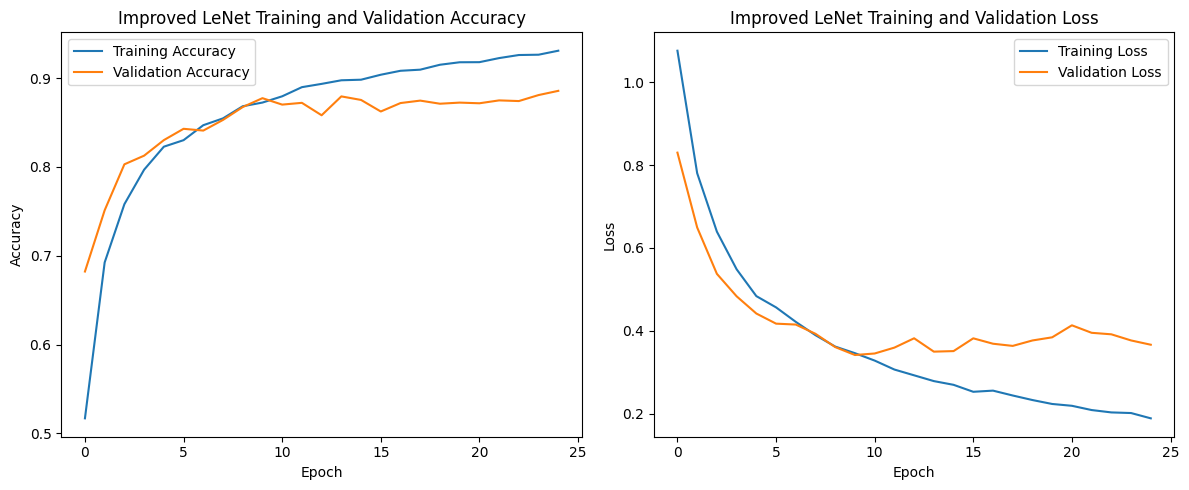

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_improved_6.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Improved LeNet Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved_6.history['loss'], label='Training Loss')
plt.plot(history_improved_6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Improved LeNet Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()